In [1]:
# Importing necessary libraries for data processing and visualizing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing necessary libraries for Algorithms
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv("F:/ML/Kaggle/House price prediction/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Text(0.5, 1.0, 'Pearson Correlation Matrix')

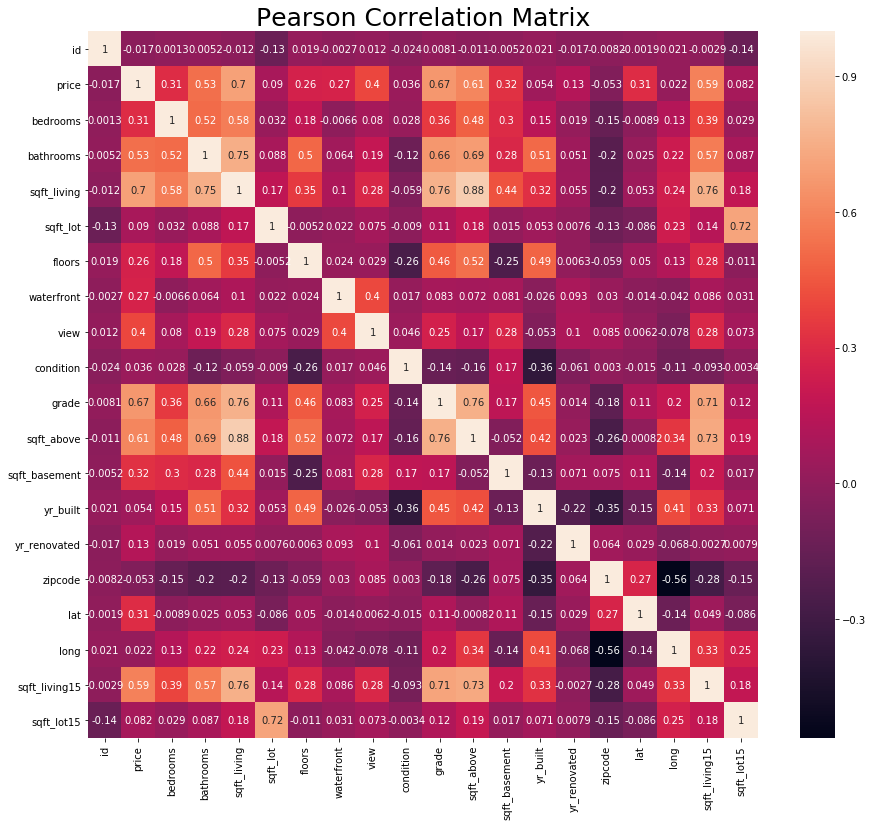

In [8]:
fig, ax = plt.subplots(figsize=(15,13))
sns.heatmap(df.corr(),annot = True)
plt.title("Pearson Correlation Matrix",size = 25)

In [9]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [10]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [11]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [13]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Bedrooms')]

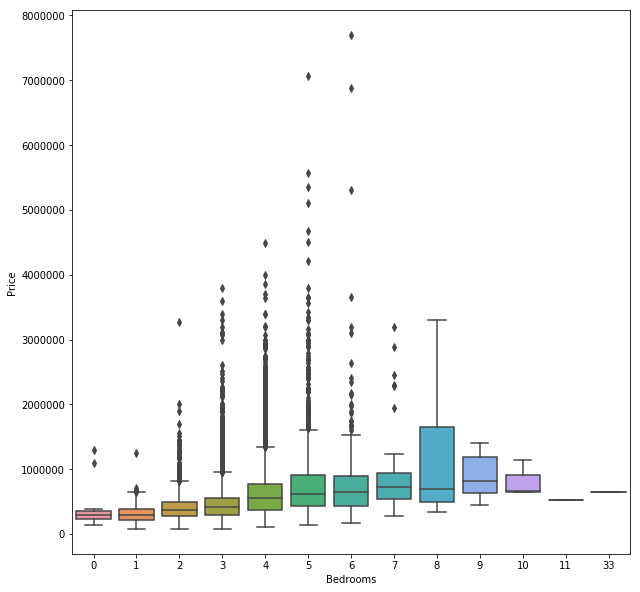

In [14]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['bedrooms'],y=df['price'])
axes.set(xlabel='Bedrooms', ylabel='Price')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'view')]

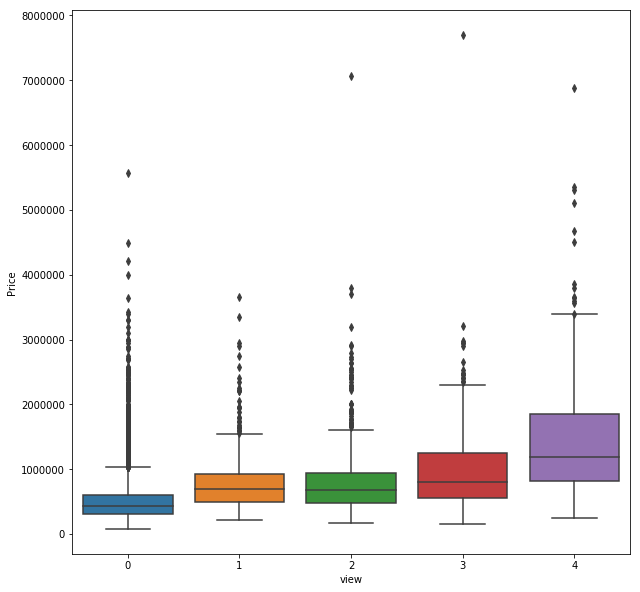

In [15]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['view'],y=df['price'])
axes.set(xlabel='view', ylabel='Price')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'floors')]

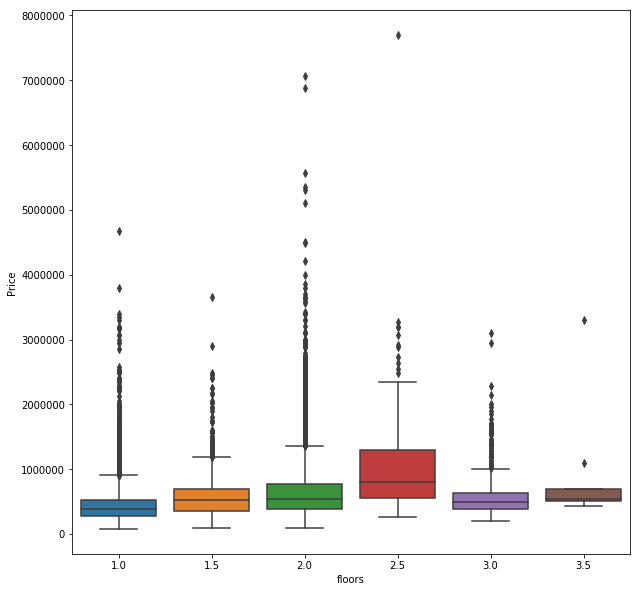

In [16]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['floors'],y=df['price'])
axes.set(xlabel='floors', ylabel='Price')

Floors have a very small effect on the Price 

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'grade')]

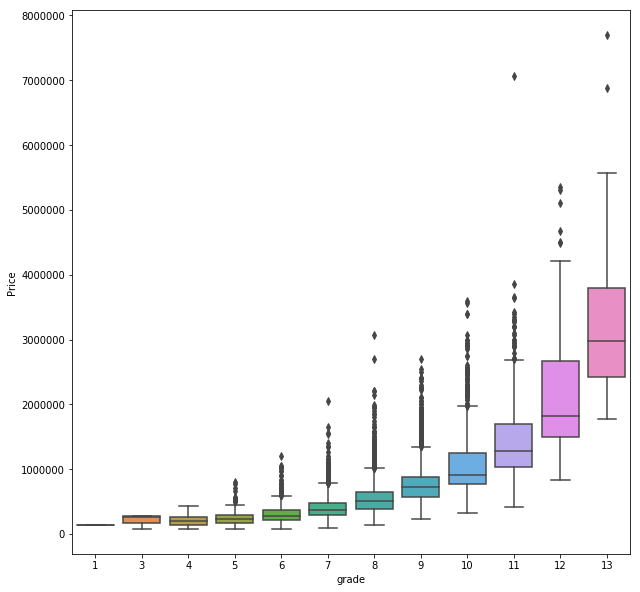

In [17]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['grade'],y=df['price'])
axes.set(xlabel='grade', ylabel='Price')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'waterfront')]

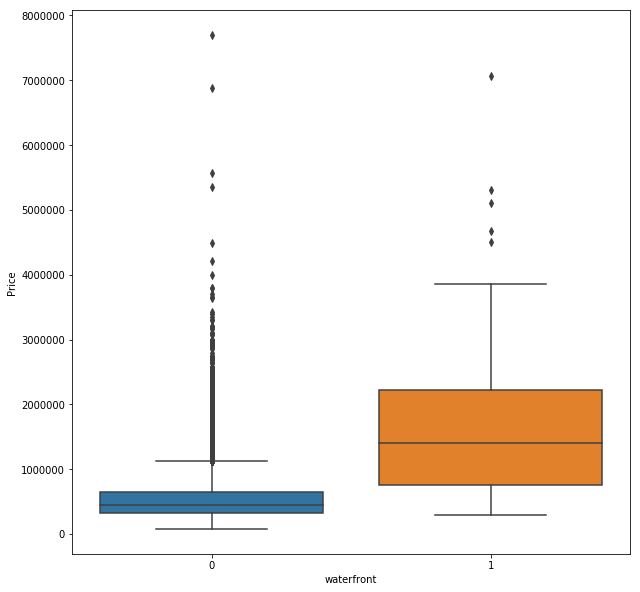

In [18]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['waterfront'],y=df['price'])
axes.set(xlabel='waterfront', ylabel='Price')

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'bathrooms')]

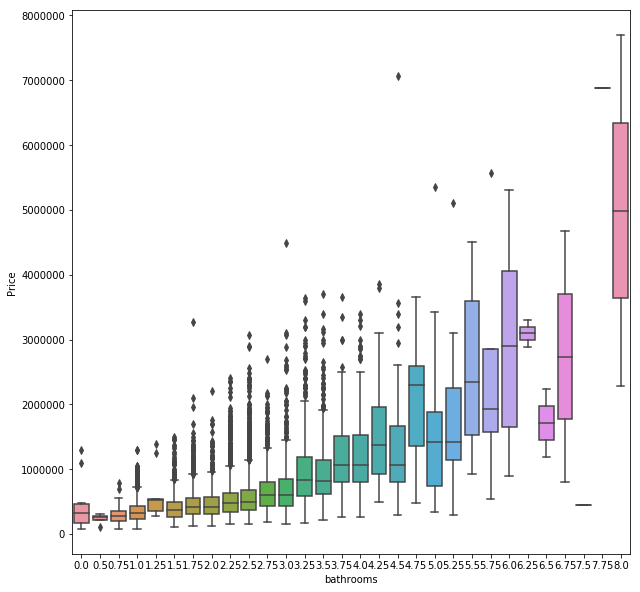

In [19]:
f, axes = plt.subplots(1, 1,figsize=(10,10))
sns.boxplot(x=df['bathrooms'],y=df['price'])
axes.set(xlabel='bathrooms', ylabel='Price')

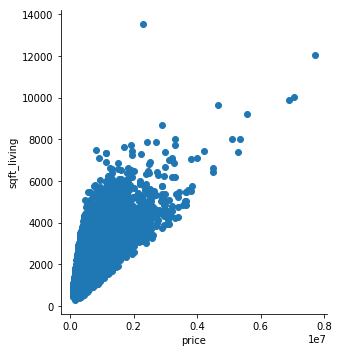

In [20]:
g = sns.FacetGrid(df,height = 5)
g.map(plt.scatter,'price','sqft_living')

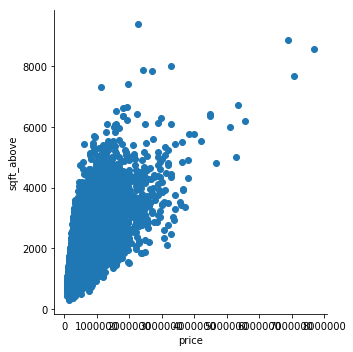

In [21]:
g = sns.FacetGrid(df,height= 5)
g.map(plt.scatter,'price','sqft_above')

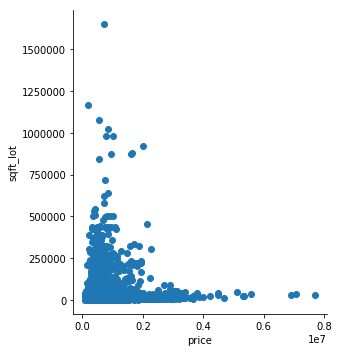

In [22]:
g = sns.FacetGrid(df,height= 5)
g.map(plt.scatter,'price','sqft_lot')

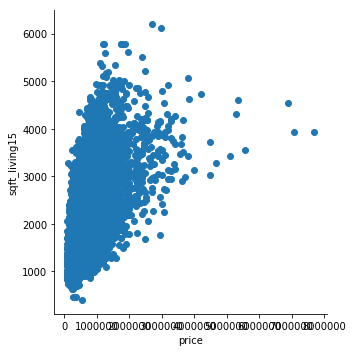

In [23]:
g = sns.FacetGrid(df,height= 5)
g.map(plt.scatter,'price','sqft_living15')

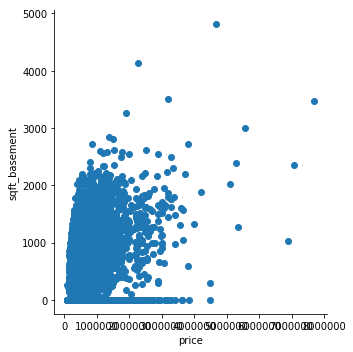

In [24]:
g = sns.FacetGrid(df,height= 5)
g.map(plt.scatter,'price','sqft_basement')

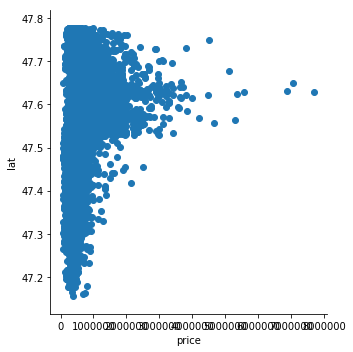

In [25]:
g = sns.FacetGrid(df,height= 5)
g.map(plt.scatter,'price','lat')

# 1. Simple Regression Model

From the Pearson Correlation Matrix and the scatter plots it is clear that sqft_living has the highest correlation with the price.Threfore in our 1st model we will consider only 1 feature i.e sqft_living

We cant consider all the features as it will lead to overfitting, so  we first make a simple model and then icrease its complexity

In [26]:
x = np.array(df['sqft_living']).reshape(-1,1)
y = np.array(df['price']).reshape(-1,1)


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size =0.8, random_state = 3)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)
print('Simple Model')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train, y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

Simple Model
Mean Squared Error (MSE)  254289.15
R-squared (training)  0.492
R-squared (testing)  0.496
Intercept:  [-47235.8113029]
Coefficient: [[282.2468152]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


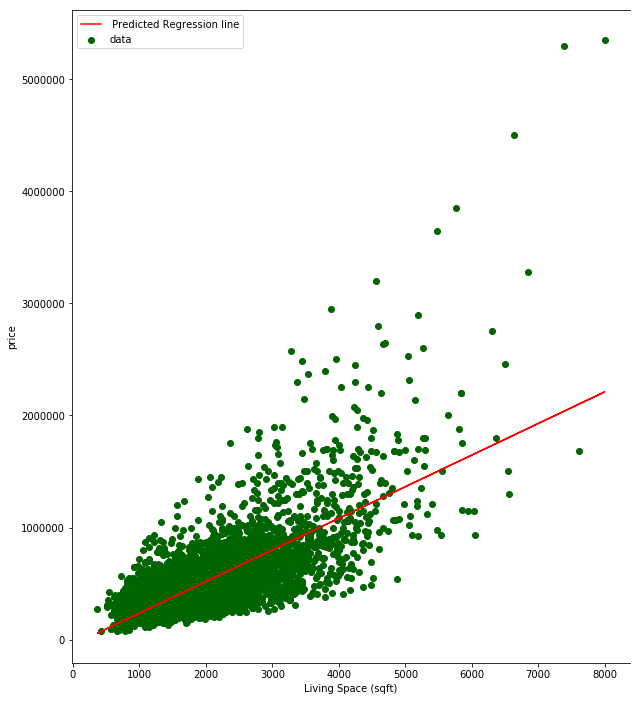

In [28]:
f, ax = plt.subplots(figsize= (10, 12))
plt.scatter(x_test, y_test, color= 'darkgreen', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

This model has a very low variance as the r2 values of train and test are very close, but it has a very high bias and its complexity needs to be increased

# 2. Complex Model 1

In [29]:
x1= df[['bathrooms','sqft_living','grade', 'sqft_above']]
y = np.array(df['price']).reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size=0.2, random_state =0)
reg= linear_model.LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
print('Complex Model_1')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train,y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))

Complex Model_1
Mean Squared Error (MSE)  231817.83
R-squared (training)  0.542
R-squared (testing)  0.548


# 3. Complex Model 2

In [30]:
x2= df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]
y = np.array(df['price']).reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x2,y, test_size=0.2, random_state =0)
reg= linear_model.LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_test)
print('Complex Model_2')
mean_squared_error = metrics.mean_squared_error(y_test, pred)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(reg.score(x_train,y_train), 3))
print('R-squared (testing) ', round(reg.score(x_test, y_test), 3))

Complex Model_2
Mean Squared Error (MSE)  203495.26
R-squared (training)  0.659
R-squared (testing)  0.652


# 4. Complex Model 3

 Polynomial Regression

In [32]:
polyfeatures = PolynomialFeatures(degree =2)
xtrain_poly=polyfeatures.fit_transform(x_train)
xtest_poly=polyfeatures.fit_transform(x_test)
poly = linear_model.LinearRegression(normalize=True)
poly.fit(xtrain_poly,y_train)
predp= poly.predict(xtest_poly)
print('Complex Model_3')
mean_squared_error = metrics.mean_squared_error(y_test, predp)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly,y_test), 3))

Complex Model_3
Mean Squared Error (MSE)  175748.37
R-squared (training)  0.763
R-squared (testing)  0.74


# 5. Complex Model 4

In [ ]:
polyfeatures = PolynomialFeatures(degree =3)
xtrain_poly=polyfeatures.fit_transform(x_train)
xtest_poly=polyfeatures.fit_transform(x_test)
poly = linear_model.LinearRegression()
poly.fit(xtrain_poly,y_train)
predp1= poly.predict(xtest_poly)
print('Complex Model_4')
mean_squared_error = metrics.mean_squared_error(y_test, predp1)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly,y_test), 3))

# 6. Ridge Regression

In [36]:
polyfeatures = PolynomialFeatures(degree =2)
xtrain_poly=polyfeatures.fit_transform(x_train)
xtest_poly=polyfeatures.fit_transform(x_test)
poly = linear_model.Ridge()
poly.fit(xtrain_poly,y_train)
predp1= poly.predict(xtest_poly)
print('Ridge model')
mean_squared_error = metrics.mean_squared_error(y_test, predp1)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly,y_test), 3))

Ridge model
Mean Squared Error (MSE)  180687.84
R-squared (training)  0.75
R-squared (testing)  0.725


In [37]:
polyfeatures = PolynomialFeatures(degree =2)
xtrain_poly=polyfeatures.fit_transform(x_train)
xtest_poly=polyfeatures.fit_transform(x_test)
poly = linear_model.Lasso()
poly.fit(xtrain_poly,y_train)
predp1= poly.predict(xtest_poly)
print('Lasso model')
mean_squared_error = metrics.mean_squared_error(y_test, predp1)
print('Mean Squared Error (MSE) ', round(np.sqrt(mean_squared_error), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, y_train), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly,y_test), 3))

Lasso model
Mean Squared Error (MSE)  184248.27
R-squared (training)  0.742
R-squared (testing)  0.715


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Conclusion :

The 3rd complex , lasso and ridge models have better r2 scores of both train and test than the other models but the variance of these models are significantly high as the difference between r2 values of test and train is very high so the complex model 2 is the best model with low bias and low variance    